In [22]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

species = pd.read_csv('species_info.csv')
observations = pd.read_csv('observations.csv')

print(species.head(20))
print(observations.head(20))



   category                scientific_name  \
0    Mammal  Clethrionomys gapperi gapperi   
1    Mammal                      Bos bison   
2    Mammal                     Bos taurus   
3    Mammal                     Ovis aries   
4    Mammal                 Cervus elaphus   
5    Mammal         Odocoileus virginianus   
6    Mammal                     Sus scrofa   
7    Mammal                  Canis latrans   
8    Mammal                    Canis lupus   
9    Mammal                    Canis rufus   
10   Mammal       Urocyon cinereoargenteus   
11   Mammal                   Vulpes fulva   
12   Mammal                  Vulpes vulpes   
13   Mammal                 Felis concolor   
14   Mammal               Felis silvestris   
15   Mammal                     Lynx rufus   
16   Mammal                  Puma concolor   
17   Mammal              Mephitis mephitis   
18   Mammal             Spilogale putorius   
19   Mammal              Lontra canadensis   

                                 

In [21]:
# Explore the data

print(f"species shape: {species.shape}")
print(f"observations shape: {observations.shape}")


print(f"species columns: {species.columns}")
print(f"observations columns: {observations.columns}")

#explore number of species
print(f"number of species:{species.scientific_name.nunique()}")

# explore categories of animals
print(f"number of categories: {species.category.nunique()}")
print(f"categories: {species.category.unique()}")
print(species.groupby("category").size())

#explore conservation statuses
print(f"number of conservation statuses:{species.conservation_status.nunique()}")
print(f"conservation statuses:{species.conservation_status.unique()}")

#explore number of NaN values in conservation column
print(f"na values:{species.conservation_status.isna().sum()}")
print(species.groupby("conservation_status").size())


# explore the parks
print(f"number of parks: {observations.park_name.nunique()}")
print(f"parks: {observations.park_name.unique()}")

#count all observations made 
print(f"number of observations:{observations.observations.sum()}")



species shape: (5824, 4)
observations shape: (23296, 3)
species columns: Index(['category', 'scientific_name', 'common_names', 'conservation_status'], dtype='object')
observations columns: Index(['scientific_name', 'park_name', 'observations'], dtype='object')
number of species:5541
number of categories: 7
categories: ['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']
category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64
number of conservation statuses:4
conservation statuses:[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']
na values:5633
conservation_status
Endangered             16
In Recovery             4
Species of Concern    161
Threatened             10
dtype: int64
number of parks: 4
parks: ['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Ye

In [71]:
# Analysis

#Question 1: What is the distribution of conservation_status for animals?


# Fill na values
species.fillna('No conservation status', inplace=True)
species.groupby("conservation_status").size()

conservationCategory = species[species.conservation_status != "No conservation status"]\
    .groupby(["conservation_status", "category"])['scientific_name']\
    .count()\
    .unstack()\
    .reset_index()


conservationCategory



category,conservation_status,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
0,Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
1,In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
2,Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
3,Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


Text(0, 0.5, 'Number of Species')

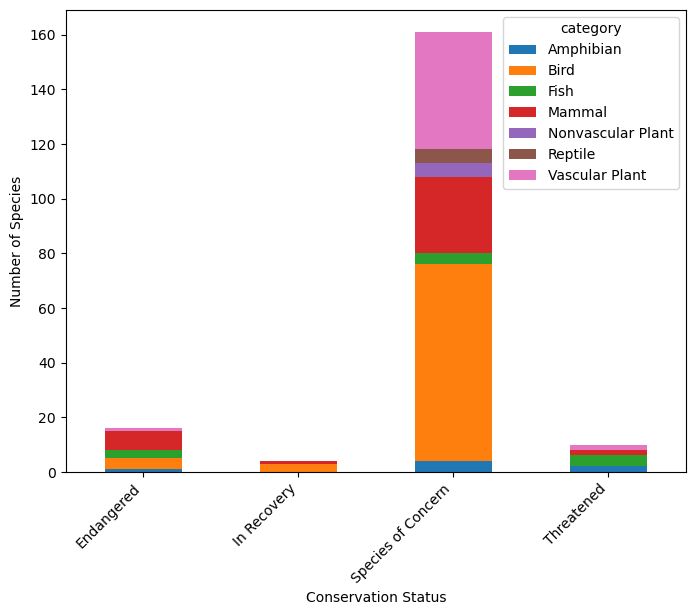

In [89]:
ax = conservationCategory.plot(kind = 'bar', figsize=(8,6), 
                                stacked=True)
ax.set_xticks(range(len(conservationCategory)))
ax.set_xticklabels(conservationCategory['conservation_status'], rotation=45, ha='right')
ax.set_xlabel("Conservation Status")
ax.set_ylabel("Number of Species")

In [90]:
#Quesetion 2: Are certain types of species more likely to be endangered?

# Create a new column called `is_protected` and include any species that had a value other than `No Conservation status`.

species['is_protected'] = species['conservation_status'] != 'No conservation status'

category_counts = species.groupby(['category', 'is_protected'])\
                        .scientific_name.nunique()\
                        .reset_index()\
                        .pivot(columns='is_protected',
                                      index='category',
                                      values='scientific_name')\
                        .reset_index()
category_counts.columns = ['category', 'not_protected', 'protected']

category_counts

category_counts['percent_protected'] = category_counts.protected / \
                                      (category_counts.protected + category_counts.not_protected) * 100

category_counts

# From this analysis, we can see that ~17 percent of mammals were under protection, as well as ~15 percent of birds. 

,category,not_protected,protected,percent_protected
0,Amphibian,72,7,8.860759
1,Bird,413,75,15.368852
2,Fish,115,11,8.730159
3,Mammal,146,30,17.045455
4,Nonvascular Plant,328,5,1.501502
5,Reptile,73,5,6.410256
6,Vascular Plant,4216,46,1.079305


In [82]:
# Question 3: Are the differences between species and their conservation status significant?

from scipy.stats import chi2_contingency

# Mammal vs Bird protected
contingency1 = [[30, 146],
              [75, 413]]
chi2_contingency(contingency1)

#The results from the chi-squared test returns many values, the second value which is 0.69 is the p-value. 
# For the value retrieved from this test, the value of 0.69 is much larger than 0.05. 
# In the case of mammals and birds there doesn't seem to be any significant relationship between them i.e. the variables independent. 

Chi2ContingencyResult(statistic=0.1617014831654557, pvalue=0.6875948096661336, dof=1, expected_freq=array([[ 27.8313253, 148.1686747],
       [ 77.1686747, 410.8313253]]))

In [83]:
# Mammal vs reptile

contingency2 = [[30, 146],
               [5, 73]]
chi2_contingency(contingency2)

# This time the p-value is 0.039 which is below the standard threshold of 0.05 which can be take that the difference between reptile and mammal is statistically significant. 
# Mammals are shown to have a statistically significant higher rate of needed protection compared with Reptiles. 

Chi2ContingencyResult(statistic=4.289183096203645, pvalue=0.03835559022969898, dof=1, expected_freq=array([[ 24.2519685, 151.7480315],
       [ 10.7480315,  67.2519685]]))

In [95]:
# Question 4: Which species were spotted the most at each park? 

# to look at the the common names from `species` to get an idea of the most prevalent animals in the dataset. 
# The data will be need to be split up into individual names. 

from itertools import chain
import string

def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

common_Names = species[species.category == "Mammal"]\
    .common_names\
    .apply(remove_punctuations)\
    .str.split().tolist()

common_Names[:6]

#to clean up duplicate words in each row since they should no be counted more than once per species.

cleanRows = []

for item in common_Names:
    item = list(dict.fromkeys(item))
    cleanRows.append(item)
    
cleanRows[:6]

# to be collapsed into one list for easier use.

res = list(chain.from_iterable(i if isinstance(i, list) else [i] for i in cleanRows))
res[:6]

# Now the data is ready to be able to count the number of occurrences of each word. 





['Gappers', 'RedBacked', 'Vole', 'American', 'Bison', 'Aurochs']

In [96]:
words_counted = []

for i in res:
    x = res.count(i)
    words_counted.append((i,x))

pd.DataFrame(set(words_counted), columns =['Word', 'Count']).sort_values("Count", ascending = False).head(10)

# From this analysis, it seems that `Bat` occurred 23 times while `Shrew` came up 18 times.

,Word,Count
189,Bat,23
28,Shrew,18
138,Myotis,17
77,Mouse,16
27,Chipmunk,13
45,American,12
4,Squirrel,12
0,Vole,11
5,Eastern,11
129,Mountain,10


In [99]:
# to figure out which rows of `species` are referring to bats.
# A new column made up of boolean values will be created to check if `is_bat` is `True`.

species['is_bat'] = species.common_names.str.contains(r"\bBat\b", regex = True)

species.head(10)


,category,scientific_name,common_names,conservation_status,is_protected,is_bat
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No conservation status,False,False
1,Mammal,Bos bison,"American Bison, Bison",No conservation status,False,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No conservation status,False,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No conservation status,False,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,No conservation status,False,False
5,Mammal,Odocoileus virginianus,White-Tailed Deer,No conservation status,False,False
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",No conservation status,False,False
7,Mammal,Canis latrans,Coyote,Species of Concern,True,False
8,Mammal,Canis lupus,Gray Wolf,Endangered,True,False
9,Mammal,Canis rufus,Red Wolf,Endangered,True,False


In [100]:
# Here is a subset of the data where `is_bat` is true, returning see the rows that matched. 
# There seems to be a lot of species of bats and a mix of protected vs. non-protected species. 

species[species.is_bat]

,category,scientific_name,common_names,conservation_status,is_protected,is_bat
28,Mammal,Corynorhinus rafinesquii,Rafinesque's Big-Eared Bat,No conservation status,False,True
29,Mammal,Eptesicus fuscus,Big Brown Bat,Species of Concern,True,True
30,Mammal,Lasionycteris noctivagans,Silver-Haired Bat,Species of Concern,True,True
31,Mammal,Lasiurus borealis,"Eastern Red Bat, Red Bat",No conservation status,False,True
32,Mammal,Lasiurus cinereus,Hoary Bat,No conservation status,False,True
36,Mammal,Myotis leibii,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
37,Mammal,Myotis lucifugus,"Little Brown Bat, Little Brown Myotis",Species of Concern,True,True
38,Mammal,Myotis septentrionalis,"Northern Long-Eared Bat, Northern Myotis",Threatened,True,True
39,Mammal,Myotis sodalis,"Indiana Bat, Indiana Or Social Myotis",Endangered,True,True
40,Mammal,Nycticeius humeralis,Evening Bat,No conservation status,False,True


In [101]:
# Next the results of the bat species will be merged with `observations` to create a `DataFrame` with observations of bats across the four national parks. 


bat_observations = observations.merge(species[species.is_bat])
bat_observations

,scientific_name,park_name,observations,category,common_names,conservation_status,is_protected,is_bat
0,Lasiurus blossevillii,Bryce National Park,113,Mammal,Western Red Bat,Species of Concern,True,True
1,Corynorhinus rafinesquii,Yosemite National Park,188,Mammal,Rafinesque's Big-Eared Bat,No conservation status,False,True
2,Nycticeius humeralis,Yellowstone National Park,219,Mammal,Evening Bat,No conservation status,False,True
3,Lasiurus blossevillii,Great Smoky Mountains National Park,70,Mammal,Western Red Bat,Species of Concern,True,True
4,Lasiurus borealis,Yosemite National Park,134,Mammal,"Eastern Red Bat, Red Bat",No conservation status,False,True
...,...,...,...,...,...,...,...,...
139,Eptesicus fuscus,Bryce National Park,72,Mammal,Big Brown Bat,Species of Concern,True,True
140,Eptesicus fuscus,Bryce National Park,72,Mammal,"Big Brown Bat, Big Brown Bat",Species of Concern,True,True
141,Myotis leibii,Yellowstone National Park,233,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
142,Lasionycteris noctivagans,Bryce National Park,128,Mammal,Silver-Haired Bat,Species of Concern,True,True


In [103]:
# to see how many total bat observations(across all species) were made at each national park.  

bat_observations.groupby('park_name').observations.sum().reset_index()

# The total number of bats observed in each park over the past 7 days are in the table below. 
# Yellowstone National Park seems to have the largest with 8,362 observations and the Great Smoky Mountains National Park having the lowest with 2,411. 

# to see each park broken down by protected bats vs. non-protected bat sightings. 

obs_by_park = bat_observations.groupby(['park_name', 'is_protected']).observations.sum().reset_index()

obs_by_park


# It seems that every park except for the Great Smoky Mountains National Park has more sightings of protected bats than not. 


,park_name,is_protected,observations
0,Bryce National Park,False,1596
1,Bryce National Park,True,1837
2,Great Smoky Mountains National Park,False,1299
3,Great Smoky Mountains National Park,True,1112
4,Yellowstone National Park,False,4044
5,Yellowstone National Park,True,4318
6,Yosemite National Park,False,2345
7,Yosemite National Park,True,2441


AttributeError: 'numpy.bool_' object has no attribute 'startswith'

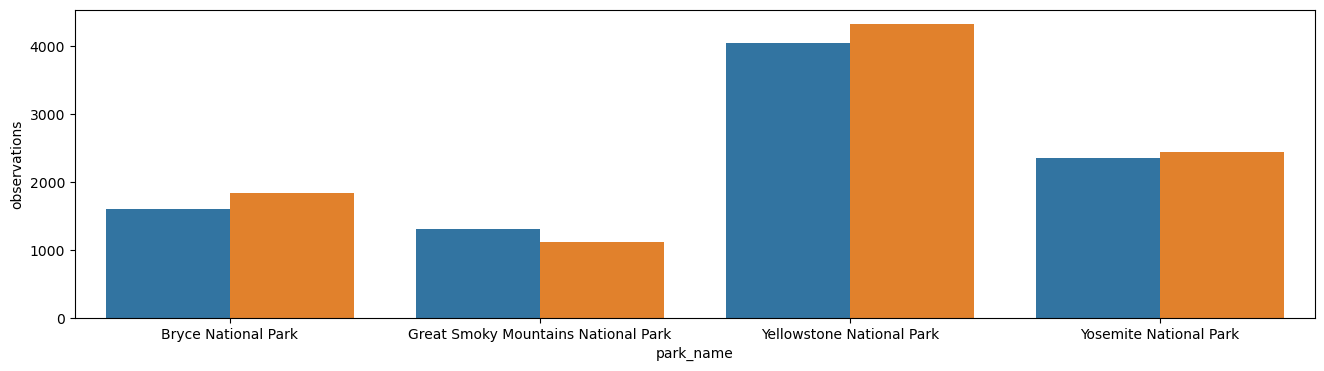

In [108]:
plt.figure(figsize=(16, 4))
sns.barplot(x=obs_by_park.park_name, y= obs_by_park.observations, hue=obs_by_park.is_protected)
plt.xlabel('National Parks')
plt.ylabel('Number of Observations')
plt.title('Observations of Bats per Week')
plt.legend(loc="upper right", bbox_to_anchor=(1.5, 1))
plt.show()

# Below is a plot from the output of the last data manipulation. 
# From this chart we can see that Yellowstone and Bryce National Parks seem to be doing a great job with their bat populations since there are more sightings of protected bats compared to non-protected species. 
# The Great Smoky Mountains National Park might need to beef up there efforts in conservation as they have seen more non-protected species.